# Check sample data

In [1]:
# Call libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Get the absolute path of the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))

# Add `src` to the system path
sys.path.insert(0, src_path)

In [2]:
df = pd.read_csv('../sample_data/All_stock.csv',sep='\t')
df.head()

,Ticker,DTYYYYMMDD,Open,High,Low,Close,Volume
0,AAA,20250311,8.65,8.88,8.63,8.88,3010700
1,ACB,20250311,26.30,26.45,26.10,26.45,9142000
2,AGG,20250311,17.10,17.90,16.80,17.90,1016000
3,ANV,20250311,17.10,17.50,17.05,17.45,2138800
4,ASM,20250311,8.10,8.10,8.01,8.10,826600


In [ ]:
# Change the date to datetime
df['DTYYYYMMDD'] = pd.to_datetime(df['DTYYYYMMDD'], format='%Y%m%d')
df.head()

,Ticker,DTYYYYMMDD,Open,High,Low,Close,Volume
0,AAA,2025-03-11,8.65,8.88,8.63,8.88,3010700
1,ACB,2025-03-11,26.30,26.45,26.10,26.45,9142000
2,AGG,2025-03-11,17.10,17.90,16.80,17.90,1016000
3,ANV,2025-03-11,17.10,17.50,17.05,17.45,2138800
4,ASM,2025-03-11,8.10,8.10,8.01,8.10,826600


In [ ]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289971 entries, 0 to 289970
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Ticker      289971 non-null  object 
 1   DTYYYYMMDD  289971 non-null  int64  
 2   Open        289971 non-null  float64
 3   High        289971 non-null  float64
 4   Low         289971 non-null  float64
 5   Close       289971 non-null  float64
 6   Volume      289971 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 15.5+ MB


In [ ]:
# Check the date of tickers
df.groupby('Ticker')['DTYYYYMMDD'].describe().loc[:, ['min', 'max']]


,min,max
Ticker,,
AAA,2016-11-25 00:00:00,2025-03-11 00:00:00
ACB,2020-12-14 00:00:00,2025-03-11 00:00:00
AGG,2020-01-09 00:00:00,2025-03-11 00:00:00
ANV,2007-12-07 00:00:00,2025-03-11 00:00:00
ASM,2010-01-18 00:00:00,2025-03-11 00:00:00
...,...,...
VNM,2006-01-19 00:00:00,2025-03-11 00:00:00
VPB,2017-08-17 00:00:00,2025-03-11 00:00:00
VPI,2018-06-29 00:00:00,2025-03-11 00:00:00


# Process sample data

## Filling missing values

In [3]:
from process.process_missing_data import process_missing_data

# Process missing data , extrapolation method is default
new_df = process_missing_data('../sample_data/All_stock.csv')
new_df.head()

c:\Users\HP\Desktop\Stock-Data-analysist\src\process\process_missing_data.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled.iloc[:, 1:] = df_filled.iloc[:, 1:].interpolate(method='linear', limit_direction='both')
c:\Users\HP\Desktop\Stock-Data-analysist\src\process\process_missing_data.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled.iloc[:, 1:] = df_filled.iloc[:, 1:].interpolate(method='linear', limit_direction='both')
c:\Users\HP\Desktop\Stock-Data-analysist\src\process\process_missing_data.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled.iloc[:, 1:] = df_filled.iloc[:, 1

Done! Missing data has been filled using the selected method.


c:\Users\HP\Desktop\Stock-Data-analysist\src\process\process_missing_data.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled.iloc[:, 1:] = df_filled.iloc[:, 1:].interpolate(method='linear', limit_direction='both')
c:\Users\HP\Desktop\Stock-Data-analysist\src\process\process_missing_data.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled.iloc[:, 1:] = df_filled.iloc[:, 1:].interpolate(method='linear', limit_direction='both')


,DTYYYYMMDD,Ticker,Open,High,Low,Close,Volume
0,2016-11-25,AAA,16.4270,16.4270,15.7932,15.7941,594710.0
1,2016-11-28,AAA,15.7932,15.8460,15.2122,15.5300,172720.0
2,2016-11-29,AAA,15.4763,15.5819,15.3178,15.5300,184960.0
3,2016-11-30,AAA,15.5291,15.5819,15.3178,15.5300,270300.0
4,2016-12-01,AAA,15.5819,15.6347,14.8952,14.8961,340430.0


## Detect outliers and process them

In [4]:
from process.process_outliers import detect_outliers, process_outliers

# Detect outliers
detected_outliers_df = detect_outliers(new_df, 'second_largest',column='Close')

# Process outliers
processed_outliers_df = process_outliers(detected_outliers_df, 'replace_second_largest', column='Close')


## Visualize data

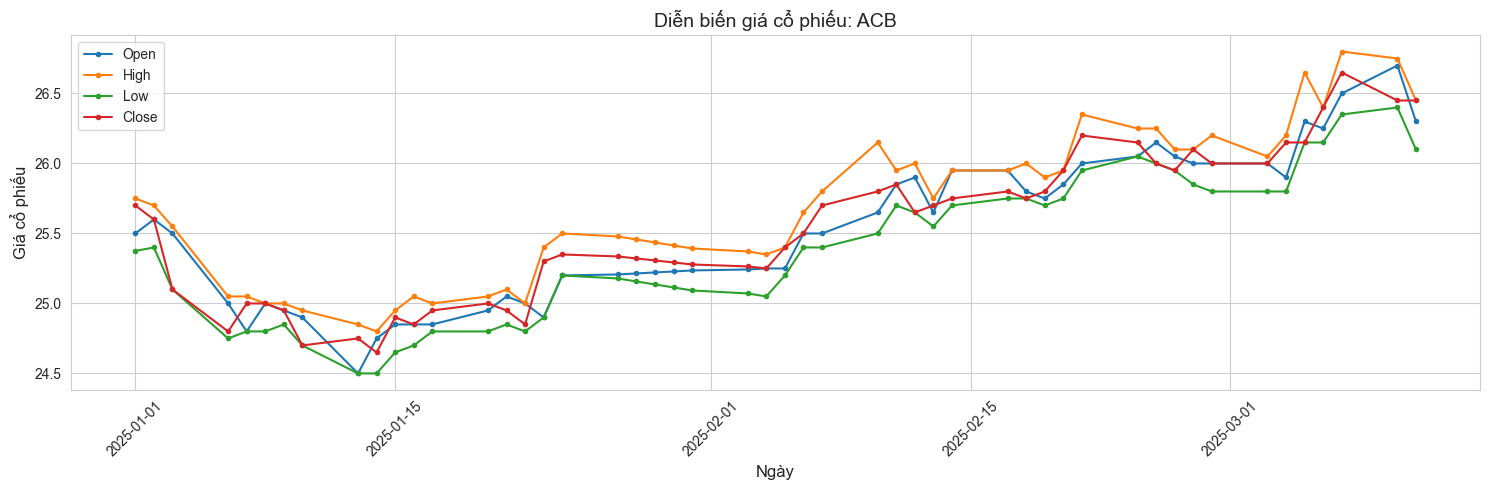

,DTYYYYMMDD,Ticker,Open,High,Low,Close,Volume,Outlier
3220,2025-01-01,ACB,25.5,25.75,25.375,25.7,6704450.0,False
3221,2025-01-02,ACB,25.6,25.70,25.400,25.6,4567900.0,False
3222,2025-01-03,ACB,25.5,25.55,25.100,25.1,5017300.0,False
3223,2025-01-06,ACB,25.0,25.05,24.750,24.8,12052700.0,False
3224,2025-01-07,ACB,24.8,25.05,24.800,25.0,5022100.0,False


In [5]:
from visualization.visualize_data import plot_data

# Plot the data , default from 2025-01-01 to 2025-03-11
plot_data(processed_outliers_df,"ACB")

## Save data

In [ ]:
current_dir = os.getcwd()  # Get the current working directory (where the notebook is running)
project_root = os.path.dirname(current_dir)  # Go up one level to the project root

# Define the path to data/processed relative to the project root
raw_data_path = os.path.join(project_root, "data", "processed")
os.makedirs(raw_data_path, exist_ok=True)  # Ensure the directory exists

# Define the file path for the CSV
file_path = os.path.join(raw_data_path, f"processed_sample_data.csv")
processed_outliers_df.to_csv(file_path, index=False, encoding='utf-8')